## Python statistics essential training - 03_01_visualization

In [1]:
#meta 4/7/2020
#Ch3. Visualizing and Describing Data
#my code and solution code bits

In [2]:
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
import mailbox
import csv

# The Power of Visualization
Statistics is the science of learning from data and of reducing complex structures and trends in the world to succinct numerical descriptions and do powerful visualizations.

# Gapminder
Identifying and explaining global trends in data with the late statistician and public health expert Hans Rosling.

- book Factfulness  
- website gapminder.org

## 0. Load Data
Basic facts about life in countries:  
the population, the expected lifetime (the average age of death for all born), the percentage of children surviving to age five, the average number of babies per woman, the gross national product divided by population, and the income available (avg) to each citizen each day (last two columns are given in 2011 equivalent dollars).

In [5]:
gapminder = pd.read_csv('lynda_data/gapminder.csv')
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


Select every 20th row, up to 200th row

In [6]:
#gapminder.head()
gapminder.loc[0:200:20]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
100,Albania,1954,Europe,1382881.0,56.59,84.829,6.31,2108.0,5.771389
120,Albania,1974,Europe,2358467.0,69.35,90.082,4.54,4177.0,11.436003
140,Albania,1994,Europe,3140634.0,73.60,96.540,2.77,3457.0,9.464750
160,Albania,2014,Europe,2889676.0,77.90,98.560,1.78,10160.0,27.816564
180,Algeria,1953,Africa,9405445.0,43.96,73.758,7.65,4077.0,11.162218


Rosling correlates that the number of babies per woman depends strongly on child mortality. With women having more children, when it's harder for them to survive.

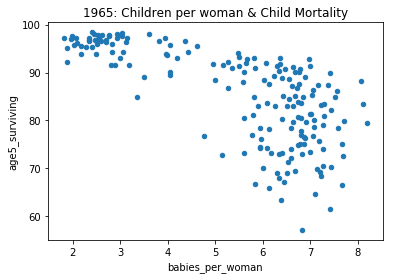

In [7]:
#numpy like smart indexing
gapminder[gapminder.year==1965].plot.scatter('babies_per_woman', 'age5_surviving', title= '1965: Children per woman & Child Mortality')

This plot shows very simply that when children have a hard time surviving, women have more babies.

Function: plot by year  
- data filtered by year, 2 columns  
- size of dots proportional to population  
- color represents continents

In [20]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = 5e-6 * data.population
    colors = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('babies_per_woman','age5_surviving',
                      s=area,c=colors,linewidths=1,edgecolors='k',
                      figsize=(12,9))
    
    #set range of axes
    plt.axis(ymin=50,ymax=105,xmin=0,xmax=8)
    plt.xlabel('babies per woman')
    plt.ylabel('% children alive at 5')

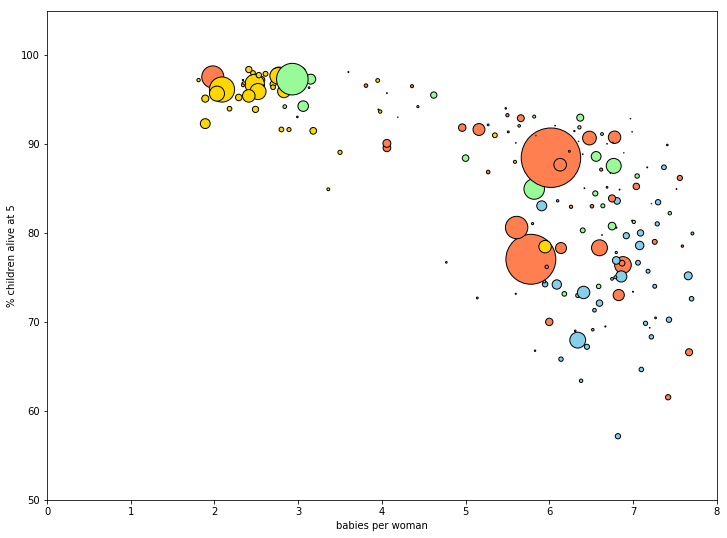

In [22]:
plotyear(1965)

This plot, for 1965, shows the world divided between the developed world, with very low child mortality and few children, and the developing world, with high natality and high mortality. 

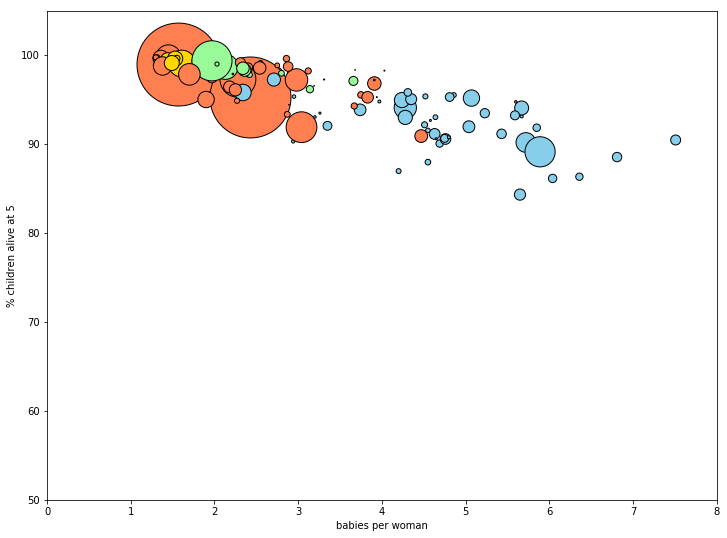

In [23]:
plotyear(2015)

In his book, Rosling argues that this distinction does largely disappear as we move into the present, and we can see that by moving the slider. In 2015, most of the world has caught up with the developed countries, so to speak.

That's a tremendous achievement for humanity, and it's beautiful to see it from just a few numbers from a simple table.

#### Interactive plot
Use Jupyter's notebook's ipywidgets, and specifically the method, interact.  
Create a slider widget that lets us select the year. We give the widget a range, a step and an initial value.

In [21]:
interact(plotyear,year=widgets.IntSlider(min=1950,max=2015,step=1,value=1965))

interactive(children=(IntSlider(value=1965, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plotyear(year)>